# Análise Exploratória de Dados de Chamados Logísticos da Cielo

Este notebook realiza uma análise exploratória detalhada de um dataset sintético de chamados logísticos da Cielo. O objetivo é identificar padrões, tendências e anomalias nos dados, focando em desempenho de atendimento, cancelamentos e cumprimento de prazos.

Cada seção de análise e cada gráfico será apresentado em uma célula separada para facilitar a visualização e interação.

## 1. Importar Bibliotecas

Importamos as bibliotecas essenciais para manipulação de dados (`pandas`), criação de gráficos (`matplotlib.pyplot`, `seaborn`) e outras utilidades.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração global para o estilo dos gráficos
plt.style.use('seaborn-v0_8')

## 2. Carregar e Inspecionar os Dados

Nesta seção, carregamos o arquivo CSV gerado pelo script de simulação e fazemos uma inspeção inicial para entender a estrutura, tipos de dados e valores nulos.

In [29]:
# Define o caminho para o arquivo de entrada
INPUT_FILE = 'input/dataset_cielo.csv' # Certifique-se de que este caminho está correto

# Carregar os dados
try:
    # Removido parse_dates daqui para fazermos a conversão explícita
    df = pd.read_csv(INPUT_FILE, sep=',')
    print("Dados carregados com sucesso!")
    print(f"Total de linhas no dataset: {len(df)}")
except FileNotFoundError:
    print(f"Erro: O arquivo '{INPUT_FILE}' não foi encontrado.")
    print("Certifique-se de que o script de geração de dados ('01_gerar_arquivos_de_exemplos.py') foi executado e gerou o arquivo.")
    # Exit the cell if file not found to prevent errors in subsequent cells
    raise FileNotFoundError(f"Arquivo não encontrado: {INPUT_FILE}")

# --- INÍCIO DA CORREÇÃO ---
# Explicitamente converte colunas de data para datetime objects
# Usando errors='coerce' para transformar valores inválidos em NaT
print("\nConvertendo colunas de data...")
df['DATA_ABERTURA'] = pd.to_datetime(df['DATA_ABERTURA'], dayfirst=True, errors='coerce')
df['DATA_ENCERRAMENTO'] = pd.to_datetime(df['DATA_ENCERRAMENTO'], dayfirst=True, errors='coerce')
df['DATA_LIMITE_ATENDIMENTO'] = pd.to_datetime(df['DATA_LIMITE_ATENDIMENTO'], dayfirst=True, errors='coerce')

print("\nTipos de dados das colunas de data após conversão:")
print(df[['DATA_ABERTURA', 'DATA_ENCERRAMENTO', 'DATA_LIMITE_ATENDIMENTO']].dtypes)
# --- FIM DA CORREÇÃO ---


print(f"\n{'#' * 30}\n# Visão Geral do Dataset\n{'#' * 30}")
print("\nPrimeiras 5 linhas do DataFrame:")
print(df.head())
print("\nInformações do DataFrame:")
df.info() # Isso deve agora mostrar datetime64[ns] para estas colunas
print("\nEstatísticas Descritivas:")
print(df.describe(include='all'))
print("\nValores Nulos por Coluna:")
print(df.isnull().sum())

# Preparação inicial de dados que serão usados em vários gráficos
df['TEMPO_ATENDIMENTO_DIAS'] = (df['DATA_ENCERRAMENTO'] - df['DATA_ABERTURA']).dt.days
atendidos = df[df['STATUS'] == 'Atendido'].copy()
cancelados = df[df['STATUS'] == 'Cancelado'].copy()

Dados carregados com sucesso!
Total de linhas no dataset: 100000

Convertendo colunas de data...

Tipos de dados das colunas de data após conversão:
DATA_ABERTURA              datetime64[ns]
DATA_ENCERRAMENTO          datetime64[ns]
DATA_LIMITE_ATENDIMENTO    datetime64[ns]
dtype: object

##############################
# Visão Geral do Dataset
##############################

Primeiras 5 linhas do DataFrame:
           LOCAL     SERVICO    STATUS MOTIVO_CANCELAMENTO DATA_ABERTURA  \
0      Guarulhos  Instalação  Atendido                 NaN    2025-06-29   
1    Santo Amaro  Instalação  Atendido                 NaN    2025-03-30   
2          Moema  Manutenção  Atendido                 NaN    2025-05-12   
3    Barra Funda  Instalação  Atendido                 NaN    2025-06-10   
4  Vila Madalena  Instalação  Atendido                 NaN    2025-06-24   

           DATA_ENCERRAMENTO DATA_LIMITE_ATENDIMENTO  PRAZO_HORAS ENTREGA  \
0 2025-01-07 20:12:34.947340     2025-06-29 16:00:00   

/tmp/ipykernel_23448/671252942.py:20: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['DATA_ABERTURA'] = pd.to_datetime(df['DATA_ABERTURA'], dayfirst=True, errors='coerce')
/tmp/ipykernel_23448/671252942.py:22: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['DATA_LIMITE_ATENDIMENTO'] = pd.to_datetime(df['DATA_LIMITE_ATENDIMENTO'], dayfirst=True, errors='coerce')


## 3. Análise da Distribuição por Variáveis Categóricas

### 3.1. Chamados por Local de Atendimento
Verifica a quantidade de chamados originados de cada local (bairro/cidade).


##############################
# Análise por LOCAL
##############################
Contagem de chamados por LOCAL:
LOCAL
Moema            9182
Barra Funda      9180
Pinheiros        9135
Guarulhos        9132
Itaim Bibi       9083
Lapa             9072
Tatuapé          9060
Osasco           9054
Jardins          9051
Santo Amaro      9037
Vila Madalena    9014
Name: count, dtype: int64


/tmp/ipykernel_23448/1839304360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='LOCAL', order=df['LOCAL'].value_counts().index, palette='viridis')


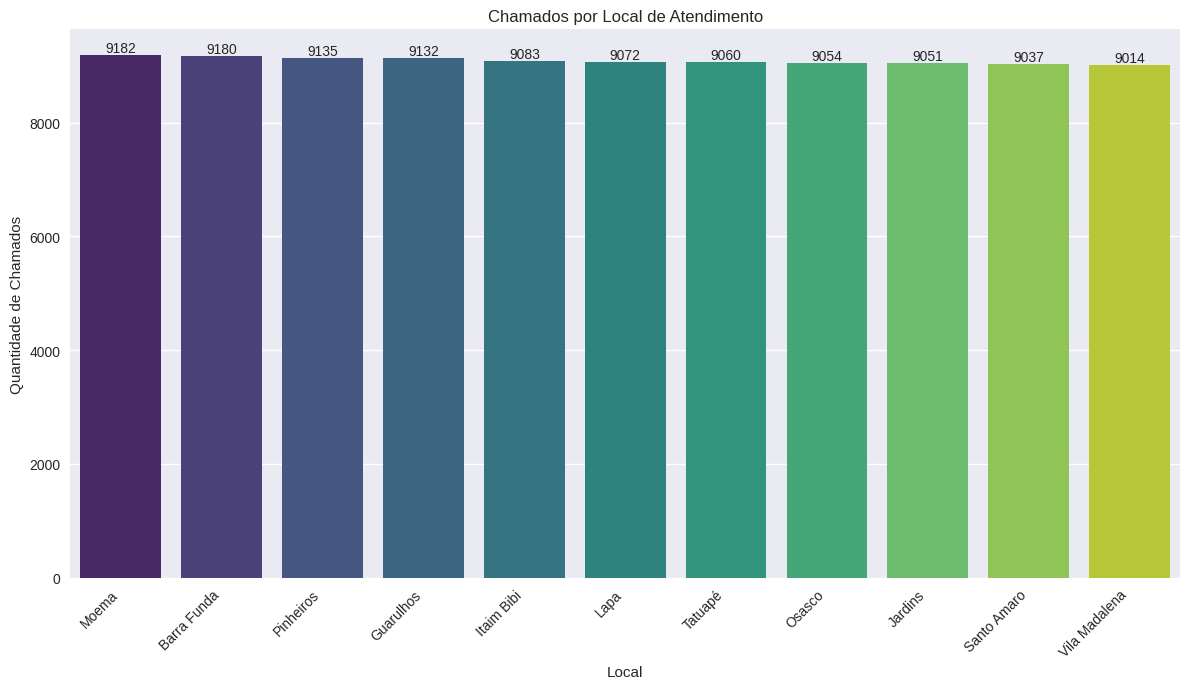

In [30]:
print(f"\n{'#' * 30}\n# Análise por LOCAL\n{'#' * 30}")
print("Contagem de chamados por LOCAL:")
print(df['LOCAL'].value_counts())

plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, x='LOCAL', order=df['LOCAL'].value_counts().index, palette='viridis')
plt.title('Chamados por Local de Atendimento')
plt.xlabel('Local')
plt.ylabel('Quantidade de Chamados')
plt.xticks(rotation=45, ha='right')
# Adiciona os valores nas barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()
plt.close()

### 3.2. Chamados por Tipo de Serviço
Observa a distribuição dos chamados entre os diferentes tipos de serviço.


##############################
# Análise por SERVICO
##############################
Contagem de chamados por SERVICO:
SERVICO
Instalação    50052
Manutenção    49948
Name: count, dtype: int64


/tmp/ipykernel_23448/2605892054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='SERVICO', order=df['SERVICO'].value_counts().index, palette='viridis')


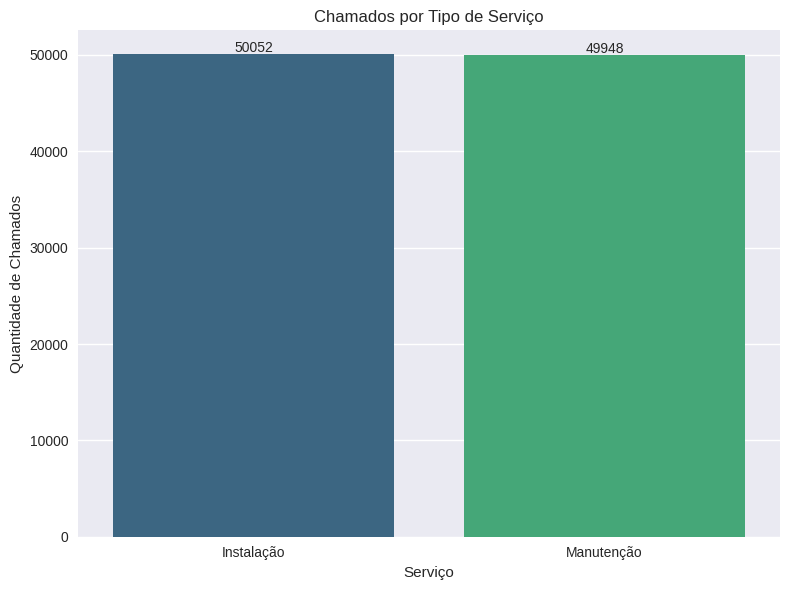

In [31]:
print(f"\n{'#' * 30}\n# Análise por SERVICO\n{'#' * 30}")
print("Contagem de chamados por SERVICO:")
print(df['SERVICO'].value_counts())

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='SERVICO', order=df['SERVICO'].value_counts().index, palette='viridis')
plt.title('Chamados por Tipo de Serviço')
plt.xlabel('Serviço')
plt.ylabel('Quantidade de Chamados')
# Adiciona os valores nas barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()
plt.close()

### 3.3. Distribuição de Status dos Chamados
Examina a proporção de chamados atendidos versus cancelados.


##############################
# Análise por STATUS
##############################
Contagem de chamados por STATUS:
STATUS
Atendido     76662
Cancelado    23338
Name: count, dtype: int64


/tmp/ipykernel_23448/241315920.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='STATUS', order=df['STATUS'].value_counts().index, palette='viridis')


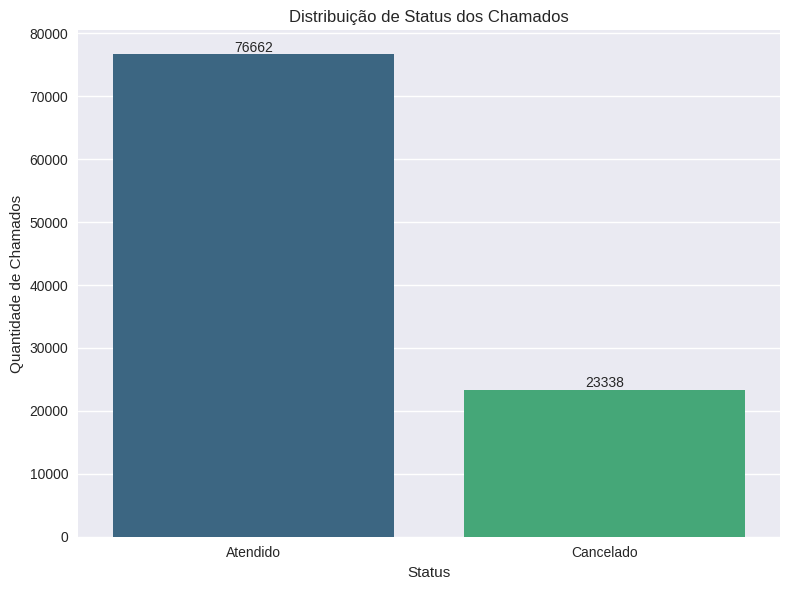

In [32]:
print(f"\n{'#' * 30}\n# Análise por STATUS\n{'#' * 30}")
print("Contagem de chamados por STATUS:")
print(df['STATUS'].value_counts())

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='STATUS', order=df['STATUS'].value_counts().index, palette='viridis')
plt.title('Distribuição de Status dos Chamados')
plt.xlabel('Status')
plt.ylabel('Quantidade de Chamados')
# Adiciona os valores nas barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

### 3.4. Motivos de Cancelamento Mais Comuns
Para os chamados que foram cancelados, investiga os motivos mais frequentes.


##############################
# Análise de Motivos de Cancelamento
##############################
Contagem de motivos de cancelamento:
MOTIVO_CANCELAMENTO
Problema técnico            5245
Equipamento indisponível    4572
Endereço errado             4541
Solicitação do cliente      4527
Cliente ausente             4453
Name: count, dtype: int64


/tmp/ipykernel_23448/508631118.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=cancelados, y='MOTIVO_CANCELAMENTO',


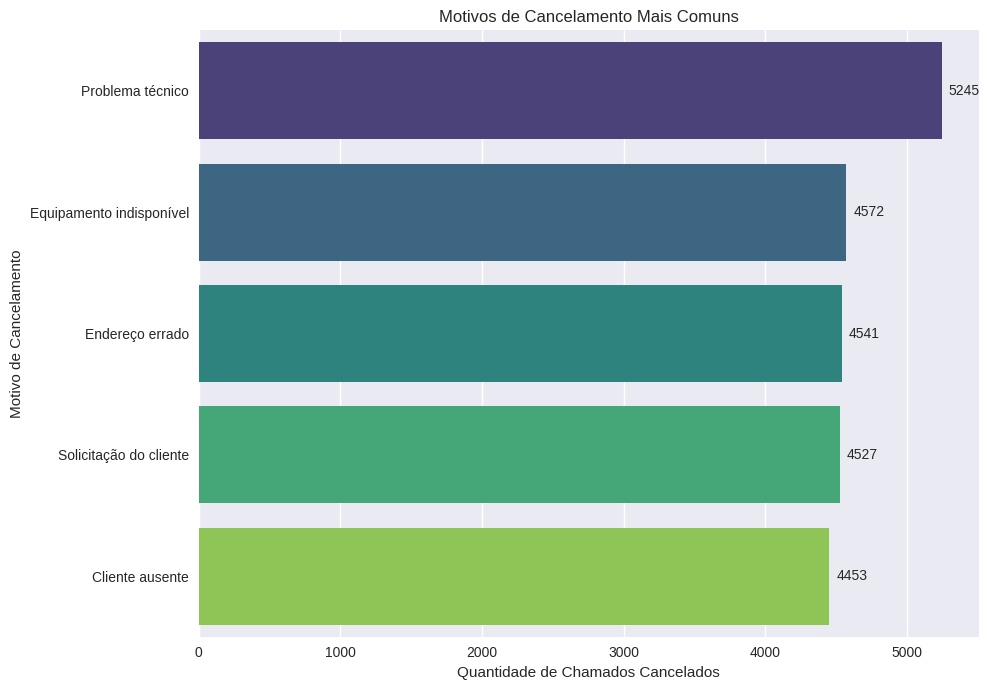

In [33]:
print(f"\n{'#' * 30}\n# Análise de Motivos de Cancelamento\n{'#' * 30}")
if 'MOTIVO_CANCELAMENTO' in df.columns:
    if not cancelados.empty:
        print("Contagem de motivos de cancelamento:")
        print(cancelados['MOTIVO_CANCELAMENTO'].value_counts())
        plt.figure(figsize=(10, 7))
        ax = sns.countplot(data=cancelados, y='MOTIVO_CANCELAMENTO',
                           order=cancelados['MOTIVO_CANCELAMENTO'].value_counts().index, palette='viridis')
        plt.title('Motivos de Cancelamento Mais Comuns')
        plt.xlabel('Quantidade de Chamados Cancelados')
        plt.ylabel('Motivo de Cancelamento')
        # Adiciona os valores nas barras
        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                        ha='left', va='center', xytext=(5, 0), textcoords='offset points')
        plt.tight_layout()
        plt.show()
        plt.close()
    else:
        print("Não há chamados com status 'Cancelado' para analisar motivos.")
else:
    print("Coluna 'MOTIVO_CANCELAMENTO' não encontrada no dataset.")

## 4. Análise de Tempo e Prazo

### 4.1. Distribuição do Tempo de Atendimento
Analisa o tempo que leva para os chamados serem atendidos (excluindo cancelados).


##############################
# Análise do Tempo de Atendimento
##############################
Estatísticas do TEMPO_ATENDIMENTO_DIAS (Chamados 'Atendido'):
count    30475.000000
mean        85.296210
std        119.677666
min       -174.000000
25%          1.000000
50%         90.000000
75%        179.000000
max        328.000000
Name: TEMPO_ATENDIMENTO_DIAS, dtype: float64
Média do Tempo de Atendimento: 85.30 dias


/tmp/ipykernel_23448/3166798879.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(atendidos['TEMPO_ATENDIMENTO_DIAS'].dropna(), bins=20, palette='viridis')


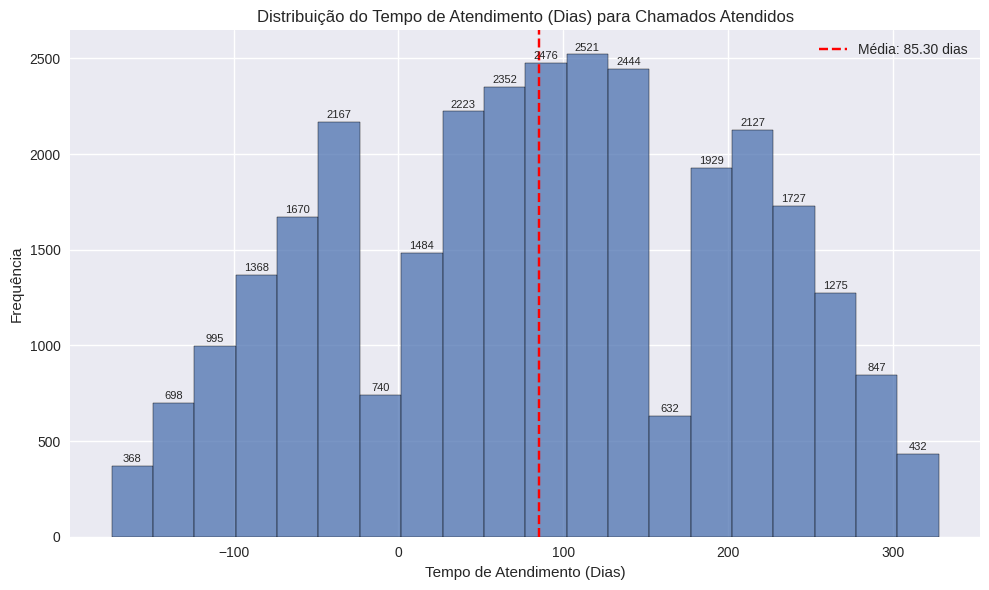

In [34]:
print(f"\n{'#' * 30}\n# Análise do Tempo de Atendimento\n{'#' * 30}")

if not atendidos.empty and 'TEMPO_ATENDIMENTO_DIAS' in atendidos.columns:
    print("Estatísticas do TEMPO_ATENDIMENTO_DIAS (Chamados 'Atendido'):")
    tempo_atendimento_media = atendidos['TEMPO_ATENDIMENTO_DIAS'].dropna().mean()
    print(atendidos['TEMPO_ATENDIMENTO_DIAS'].dropna().describe())
    print(f"Média do Tempo de Atendimento: {tempo_atendimento_media:.2f} dias")

    plt.figure(figsize=(10, 6))
    ax = sns.histplot(atendidos['TEMPO_ATENDIMENTO_DIAS'].dropna(), bins=20, palette='viridis')
    plt.title('Distribuição do Tempo de Atendimento (Dias) para Chamados Atendidos')
    plt.xlabel('Tempo de Atendimento (Dias)')
    plt.ylabel('Frequência')
    plt.tight_layout()

    # Adiciona linha da média
    plt.axvline(tempo_atendimento_media, color='red', linestyle='--',
                label=f'Média: {tempo_atendimento_media:.2f} dias')
    plt.legend()

    # Adiciona os valores nas barras do histograma
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Anota apenas barras com altura > 0
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)
    plt.show()
    plt.close()
else:
    print("Não há chamados 'Atendido' ou a coluna 'TEMPO_ATENDIMENTO_DIAS' não pôde ser calculada.")

### 4.2. Cumprimento do Prazo Máximo para Encerramento
Avalia se os chamados atendidos foram concluídos dentro do prazo limite estabelecido.


##############################
# Análise do Cumprimento do Prazo Máximo para Encerramento
##############################
Percentual de chamados 'Atendido' dentro do Prazo Máximo para Encerramento: 10.45%


/tmp/ipykernel_23448/3965377281.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=atendidos_prazo, x='DENTRO_DO_PRAZO_LIMITE', palette='viridis')


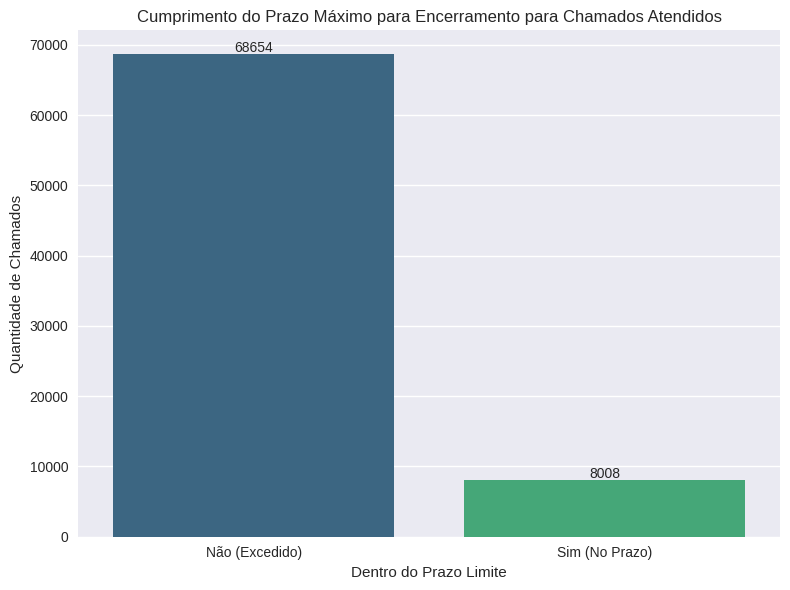

In [35]:
print(f"\n{'#' * 30}\n# Análise do Cumprimento do Prazo Máximo para Encerramento\n{'#' * 30}")
if 'DATA_LIMITE_ATENDIMENTO' in df.columns and 'DATA_ENCERRAMENTO' in df.columns:
    atendidos_prazo = df[df['STATUS'] == 'Atendido'].copy()
    if not atendidos_prazo.empty:
        atendidos_prazo['DENTRO_DO_PRAZO_LIMITE'] = atendidos_prazo['DATA_ENCERRAMENTO'] <= atendidos_prazo[
            'DATA_LIMITE_ATENDIMENTO']

        pct_dentro_prazo = atendidos_prazo['DENTRO_DO_PRAZO_LIMITE'].mean() * 100
        print(
            f"Percentual de chamados 'Atendido' dentro do Prazo Máximo para Encerramento: {pct_dentro_prazo:.2f}%")

        plt.figure(figsize=(8, 6))
        ax = sns.countplot(data=atendidos_prazo, x='DENTRO_DO_PRAZO_LIMITE', palette='viridis')
        plt.title('Cumprimento do Prazo Máximo para Encerramento para Chamados Atendidos')
        plt.xlabel('Dentro do Prazo Limite')
        plt.ylabel('Quantidade de Chamados')
        plt.xticks([0, 1], ['Não (Excedido)', 'Sim (No Prazo)'])
        # Adiciona os valores nas barras
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        plt.tight_layout()
        plt.show()
        plt.close()
    else:
        print("Não há chamados 'Atendido' para analisar o Prazo Máximo para Encerramento.")
else:
    print(
        "Colunas 'DATA_LIMITE_ATENDIMENTO' ou 'DATA_ENCERRAMENTO' não encontradas para análise do Prazo Máximo para Encerramento.")

### 4.3. Distribuição de Dias em Relação ao Prazo Máximo para Encerramento
Detalha o quão adiantado ou atrasado os chamados atendidos foram concluídos em relação ao prazo limite.


Estatísticas dos DIAS_EM_RELACAO_AO_PRAZO_LIMITE (positivo = atraso, negativo = adiantamento):
count    30475.000000
mean        83.283281
std        119.682541
min       -179.000000
25%         -2.000000
50%         88.000000
75%        177.000000
max        327.000000
Name: DIAS_EM_RELACAO_AO_PRAZO_LIMITE, dtype: float64
Média de Dias em Relação ao Prazo Limite: 83.28 dias


/tmp/ipykernel_23448/3449682064.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(atendidos_prazo['DIAS_EM_RELACAO_AO_PRAZO_LIMITE'].dropna(), bins=30, palette='viridis')


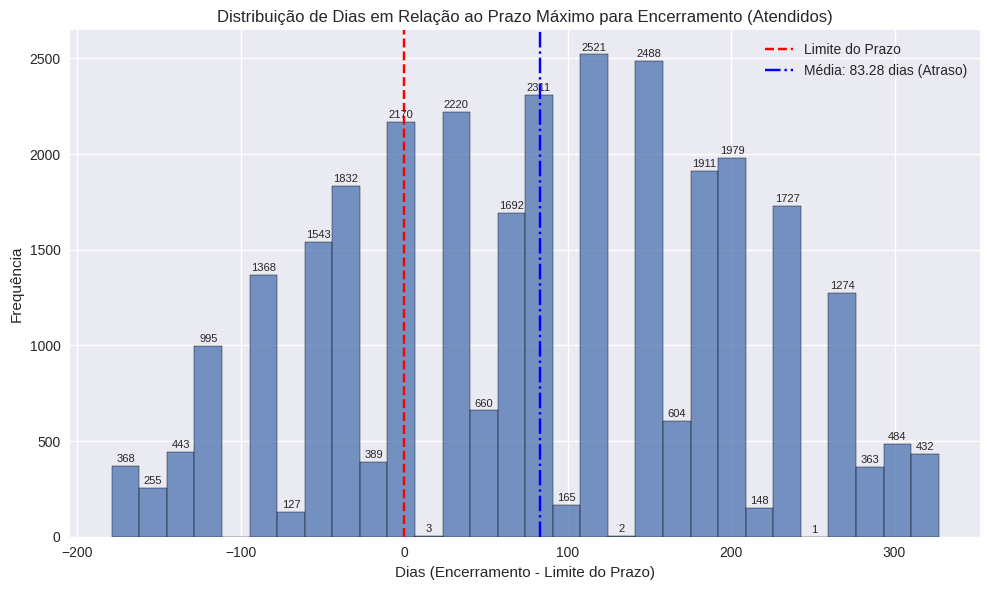

In [36]:
if 'DATA_LIMITE_ATENDIMENTO' in df.columns and 'DATA_ENCERRAMENTO' in df.columns and not atendidos_prazo.empty:
    atendidos_prazo['DIAS_EM_RELACAO_AO_PRAZO_LIMITE'] = (
            atendidos_prazo['DATA_ENCERRAMENTO'] - atendidos_prazo['DATA_LIMITE_ATENDIMENTO']).dt.days

    media_dias_em_relacao_prazo = atendidos_prazo['DIAS_EM_RELACAO_AO_PRAZO_LIMITE'].dropna().mean()

    print("\nEstatísticas dos DIAS_EM_RELACAO_AO_PRAZO_LIMITE (positivo = atraso, negativo = adiantamento):")
    print(atendidos_prazo['DIAS_EM_RELACAO_AO_PRAZO_LIMITE'].dropna().describe())
    print(f"Média de Dias em Relação ao Prazo Limite: {media_dias_em_relacao_prazo:.2f} dias")

    plt.figure(figsize=(10, 6))
    ax = sns.histplot(atendidos_prazo['DIAS_EM_RELACAO_AO_PRAZO_LIMITE'].dropna(), bins=30, palette='viridis')
    plt.title('Distribuição de Dias em Relação ao Prazo Máximo para Encerramento (Atendidos)')
    plt.xlabel('Dias (Encerramento - Limite do Prazo)')
    plt.ylabel('Frequência')
    plt.axvline(0, color='red', linestyle='--', label='Limite do Prazo')

    if media_dias_em_relacao_prazo > 0:
        label_media = f'Média: {media_dias_em_relacao_prazo:.2f} dias (Atraso)'
    elif media_dias_em_relacao_prazo < 0:
        label_media = f'Média: {abs(media_dias_em_relacao_prazo):.2f} dias (Adiantamento)'
    else:
        label_media = f'Média: {media_dias_em_relacao_prazo:.2f} dias (No Prazo)'

    plt.axvline(media_dias_em_relacao_prazo, color='blue', linestyle='-.', label=label_media)

    plt.legend()
    plt.tight_layout()
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)
    plt.show()
    plt.close()
else:
    print("Condições não atendidas para análise de Dias em Relação ao Prazo Limite.")

## 5. Análise Temporal

### 5.1. Evolução Mensal do Volume de Chamados
Visualiza a tendência do número de chamados abertos ao longo do tempo.


##############################
# Análise Temporal
##############################
Chamados por Mês de Abertura:
ANO_MES_ABERTURA
2025-01    17050
2025-02    15427
2025-03    17246
2025-04    16574
2025-05    17284
2025-06    16419
Freq: M, Name: count, dtype: int64


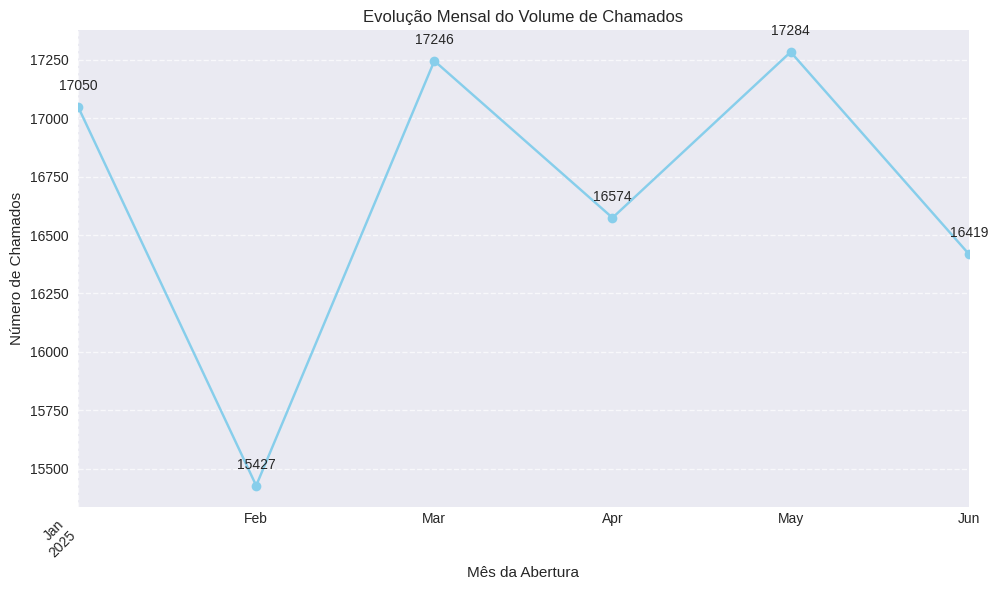

In [37]:
print(f"\n{'#' * 30}\n# Análise Temporal\n{'#' * 30}")
if 'DATA_ABERTURA' in df.columns:
    df['ANO_MES_ABERTURA'] = df['DATA_ABERTURA'].dt.to_period('M')

    chamados_por_mes = df['ANO_MES_ABERTURA'].value_counts().sort_index()

    print("Chamados por Mês de Abertura:")
    print(chamados_por_mes)

    plt.figure(figsize=(10, 6))
    ax = chamados_por_mes.plot(kind='line', marker='o', color='skyblue')
    plt.title('Evolução Mensal do Volume de Chamados')
    plt.xlabel('Mês da Abertura')
    plt.ylabel('Número de Chamados')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    for x, y in chamados_por_mes.items():
        ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom')
    plt.show()
    plt.close()
else:
    print("Coluna 'DATA_ABERTURA' não encontrada para análise temporal.")

## 6. Análise Aprofundada: Desempenho por Local

Nesta seção, aprofundamos a análise para entender o desempenho dos diferentes locais de atendimento sob diversas métricas.

### 6.1. Taxa de Cancelamento por Local
Identifica os locais com as maiores taxas de cancelamento de chamados.


==================== Taxa de Cancelamento por Local ====================
Taxa de Cancelamento (%) por Local:
STATUS         Taxa_Cancelamento
LOCAL                           
Guarulhos              34.384582
Osasco                 22.918047
Moema                  22.729253
Vila Madalena          22.587087
Jardins                22.472655
Tatuapé                22.262693
Pinheiros              22.167488
Lapa                   22.089947
Barra Funda            21.938998
Santo Amaro            21.633285
Itaim Bibi             21.479687


/tmp/ipykernel_23448/2874145378.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancelamentos_por_local_ordenado.index, y=cancelamentos_por_local_ordenado['Taxa_Cancelamento'],


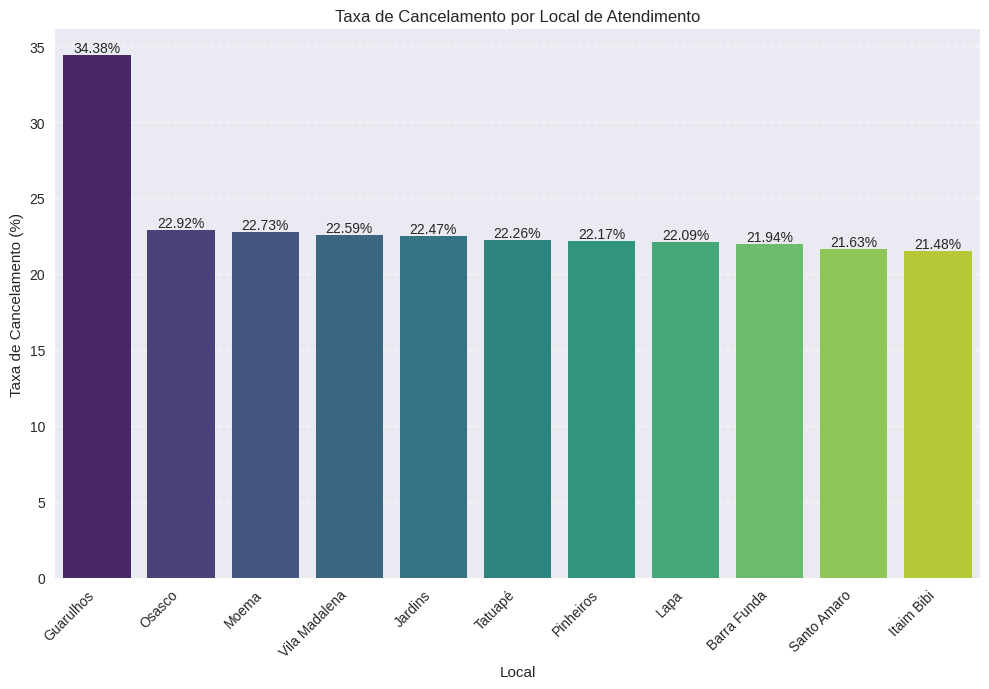

In [38]:
print(f"\n{'=' * 20} Taxa de Cancelamento por Local {'=' * 20}")
cancelamentos_por_local = df.groupby('LOCAL')['STATUS'].value_counts(normalize=True).unstack().fillna(0)
# Apenas calcula se a coluna 'Cancelado' existe (i.e., houve cancelamentos)
if 'Cancelado' in cancelamentos_por_local.columns:
    cancelamentos_por_local['Taxa_Cancelamento'] = cancelamentos_por_local['Cancelado'] * 100
    cancelamentos_por_local_ordenado = cancelamentos_por_local.sort_values(by='Taxa_Cancelamento', ascending=False)

    print("Taxa de Cancelamento (%) por Local:")
    print(cancelamentos_por_local_ordenado[['Taxa_Cancelamento']])

    fig, ax = plt.subplots(figsize=(10, 7))
    sns.barplot(x=cancelamentos_por_local_ordenado.index, y=cancelamentos_por_local_ordenado['Taxa_Cancelamento'],
                palette='viridis', ax=ax)

    plt.title('Taxa de Cancelamento por Local de Atendimento')
    plt.xlabel('Local')
    plt.ylabel('Taxa de Cancelamento (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.tight_layout()
    plt.show()
    plt.close(fig)
else:
    print("Não há chamados 'Cancelado' no dataset para calcular a taxa de cancelamento por local.")

### 6.2. Percentual de Prazo Máximo para Encerramento Cumprido por Local
Compara a eficiência dos locais em cumprir os prazos de atendimento.


==================== Percentual de Prazo Máximo para Encerramento Cumprido por Local ====================
Percentual de Prazo Máximo para Encerramento Cumprido (%) por Local (Apenas Atendidos):
LOCAL
Jardins           9.890266
Osasco            9.929789
Santo Amaro      10.039537
Lapa             10.101868
Pinheiros        10.548523
Moema            10.570825
Guarulhos        10.580774
Vila Madalena    10.662081
Barra Funda      10.689366
Itaim Bibi       10.908581
Tatuapé          10.989635
Name: DENTRO_DO_PRAZO_LIMITE, dtype: float64


/tmp/ipykernel_23448/1520115802.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=prazo_cumprido_por_local_ordenado.index, y=prazo_cumprido_por_local_ordenado.values,


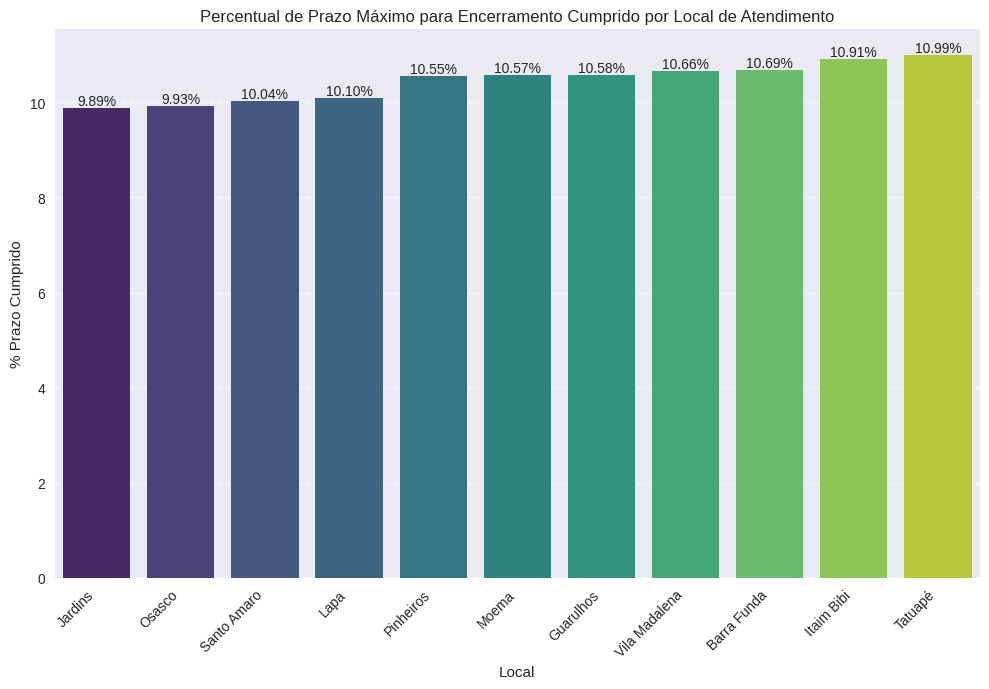

In [39]:
print(f"\n{'=' * 20} Percentual de Prazo Máximo para Encerramento Cumprido por Local {'=' * 20}")
if not atendidos.empty and 'DATA_LIMITE_ATENDIMENTO' in df.columns and 'DATA_ENCERRAMENTO' in df.columns:
    atendidos_prazo_por_local = df[df['STATUS'] == 'Atendido'].copy()
    atendidos_prazo_por_local['DENTRO_DO_PRAZO_LIMITE'] = atendidos_prazo_por_local['DATA_ENCERRAMENTO'] <= \
                                                          atendidos_prazo_por_local['DATA_LIMITE_ATENDIMENTO']

    prazo_cumprido_por_local = atendidos_prazo_por_local.groupby('LOCAL')['DENTRO_DO_PRAZO_LIMITE'].mean() * 100
    prazo_cumprido_por_local_ordenado = prazo_cumprido_por_local.sort_values(ascending=True)

    print("Percentual de Prazo Máximo para Encerramento Cumprido (%) por Local (Apenas Atendidos):")
    print(prazo_cumprido_por_local_ordenado)

    plt.figure(figsize=(10, 7))
    ax = sns.barplot(x=prazo_cumprido_por_local_ordenado.index, y=prazo_cumprido_por_local_ordenado.values,
                     palette='viridis')
    plt.title('Percentual de Prazo Máximo para Encerramento Cumprido por Local de Atendimento')
    plt.xlabel('Local')
    plt.ylabel('% Prazo Cumprido')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.tight_layout()
    plt.show()
    plt.close()
else:
    print("Dados insuficientes para calcular o percentual de prazo cumprido por local.")

### 6.3. Tempo Médio de Atendimento por Local
Mostra a média de dias para atendimento de chamados em cada local.


==================== Tempo Médio de Atendimento por Local ====================
Tempo Médio de Atendimento (Dias) por Local (Apenas Atendidos):
LOCAL
Jardins          89.344440
Santo Amaro      88.469388
Osasco           87.889444
Lapa             87.341383
Tatuapé          85.124126
Vila Madalena    84.684267
Moema            83.863289
Pinheiros        83.802827
Barra Funda      83.622310
Guarulhos        82.394336
Itaim Bibi       81.390235
Name: TEMPO_ATENDIMENTO_DIAS, dtype: float64


/tmp/ipykernel_23448/53947127.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tempo_atendimento_por_local_ordenado.index, y=tempo_atendimento_por_local_ordenado.values,


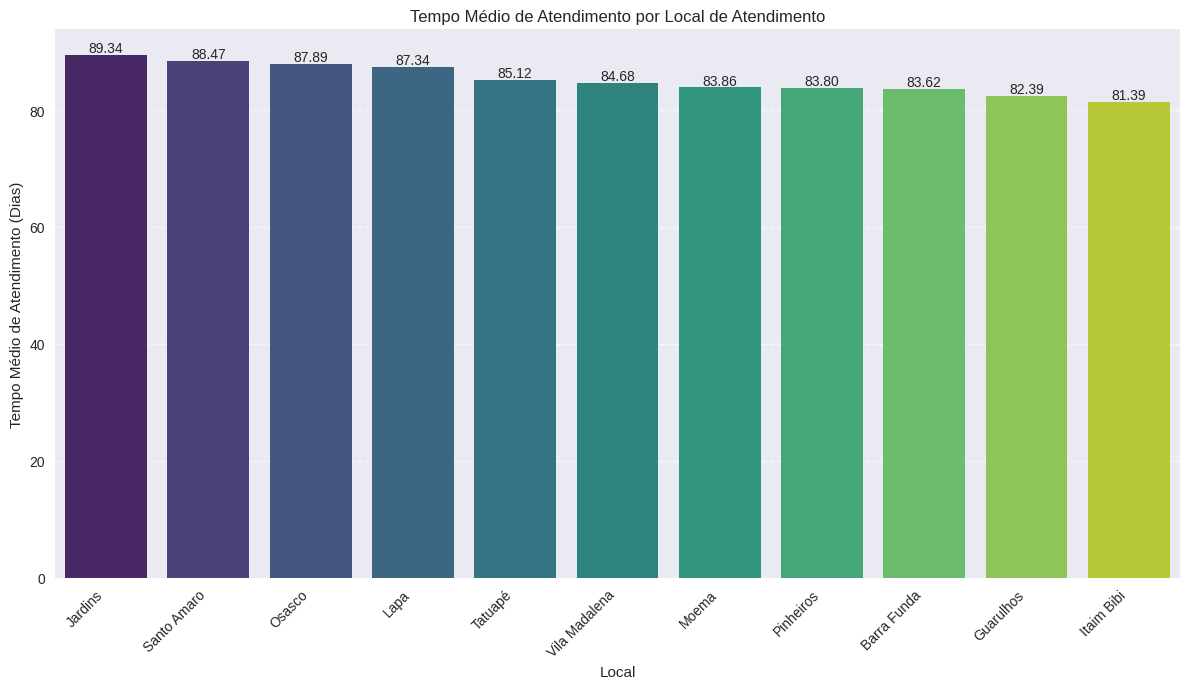

In [40]:
print(f"\n{'=' * 20} Tempo Médio de Atendimento por Local {'=' * 20}")
if not atendidos.empty and 'TEMPO_ATENDIMENTO_DIAS' in atendidos.columns:
    tempo_atendimento_por_local = atendidos.groupby('LOCAL')['TEMPO_ATENDIMENTO_DIAS'].mean()
    tempo_atendimento_por_local_ordenado = tempo_atendimento_por_local.sort_values(ascending=False)

    print("Tempo Médio de Atendimento (Dias) por Local (Apenas Atendidos):")
    print(tempo_atendimento_por_local_ordenado)

    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x=tempo_atendimento_por_local_ordenado.index, y=tempo_atendimento_por_local_ordenado.values,
                     palette='viridis')
    plt.title('Tempo Médio de Atendimento por Local de Atendimento')
    plt.xlabel('Local')
    plt.ylabel('Tempo Médio de Atendimento (Dias)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.tight_layout()
    plt.show()
    plt.close()
else:
    print("Dados insuficientes para calcular o tempo médio de atendimento por local.")

## 7. Análise Aprofundada: Desempenho por Serviço

Aqui, focamos no desempenho dos diferentes tipos de serviço oferecidos.

### 7.1. Taxa de Cancelamento por Tipo de Serviço
Verifica quais serviços apresentam maior incidência de cancelamentos.


==================== Taxa de Cancelamento por Serviço ====================
Taxa de Cancelamento (%) por Serviço:
STATUS      Taxa_Cancelamento
SERVICO                      
Manutenção          30.263474
Instalação          16.426916


/tmp/ipykernel_23448/522963800.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelamentos_por_servico_ordenado.index,


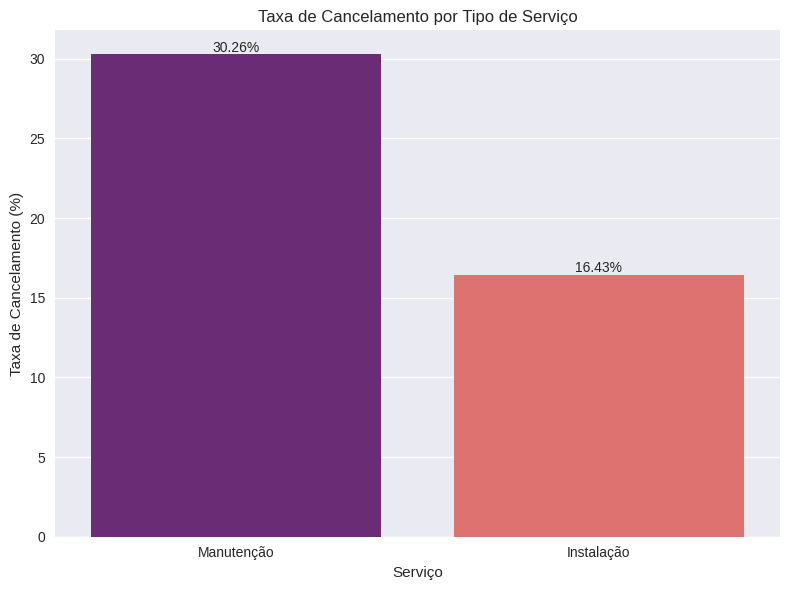

In [41]:
print(f"\n{'=' * 20} Taxa de Cancelamento por Serviço {'=' * 20}")
cancelamentos_por_servico = df.groupby('SERVICO')['STATUS'].value_counts(normalize=True).unstack().fillna(0)
if 'Cancelado' in cancelamentos_por_servico.columns:
    cancelamentos_por_servico['Taxa_Cancelamento'] = cancelamentos_por_servico['Cancelado'] * 100
    cancelamentos_por_servico_ordenado = cancelamentos_por_servico.sort_values(by='Taxa_Cancelamento', ascending=False)

    print("Taxa de Cancelamento (%) por Serviço:")
    print(cancelamentos_por_servico_ordenado[['Taxa_Cancelamento']])

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=cancelamentos_por_servico_ordenado.index,
                     y=cancelamentos_por_servico_ordenado['Taxa_Cancelamento'],
                     palette='magma')
    plt.title('Taxa de Cancelamento por Tipo de Serviço')
    plt.xlabel('Serviço')
    plt.ylabel('Taxa de Cancelamento (%)')
    # Adiciona os valores nas barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.tight_layout()
    plt.show()
    plt.close()
else:
    print("Não há chamados 'Cancelado' no dataset para calcular a taxa de cancelamento por serviço.")

### 7.2. Percentual de Prazo Máximo para Encerramento Cumprido por Serviço
Avalia a eficiência de cada serviço em cumprir os prazos de atendimento.


==================== Percentual de Prazo Máximo para Encerramento Cumprido por Serviço ====================
Percentual de Prazo Máximo para Encerramento Cumprido (%) por Serviço (Apenas Atendidos):
SERVICO
Manutenção    10.415710
Instalação    10.470954
Name: DENTRO_DO_PRAZO_LIMITE, dtype: float64


/tmp/ipykernel_23448/1444257994.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=prazo_cumprido_por_servico_ordenado.index, y=prazo_cumprido_por_servico_ordenado.values,


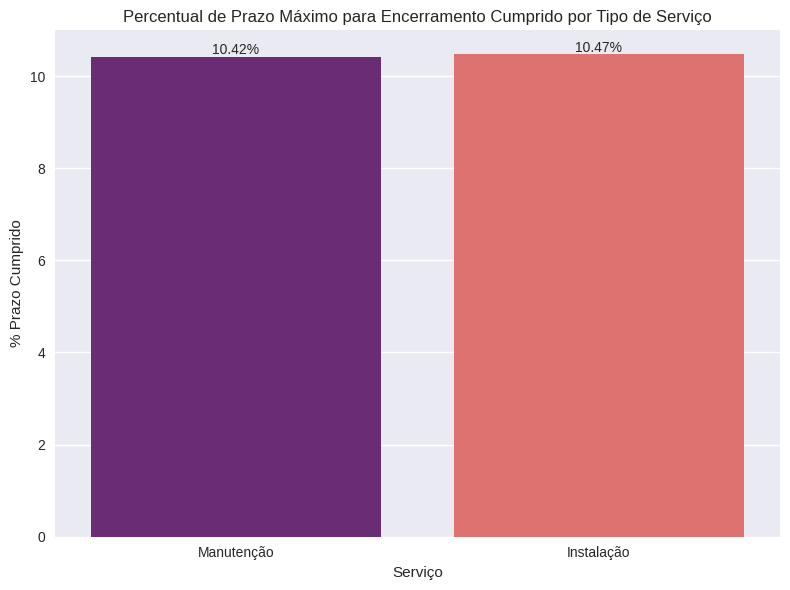

In [42]:
print(f"\n{'=' * 20} Percentual de Prazo Máximo para Encerramento Cumprido por Serviço {'=' * 20}")
if not atendidos.empty and 'DATA_LIMITE_ATENDIMENTO' in df.columns and 'DATA_ENCERRAMENTO' in df.columns:
    # Reutiliza atendidos_prazo que já foi calculada
    prazo_cumprido_por_servico = atendidos_prazo.groupby('SERVICO')['DENTRO_DO_PRAZO_LIMITE'].mean() * 100
    prazo_cumprido_por_servico_ordenado = prazo_cumprido_por_servico.sort_values(ascending=True)

    print("Percentual de Prazo Máximo para Encerramento Cumprido (%) por Serviço (Apenas Atendidos):")
    print(prazo_cumprido_por_servico_ordenado)

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=prazo_cumprido_por_servico_ordenado.index, y=prazo_cumprido_por_servico_ordenado.values,
                     palette='magma')
    plt.title('Percentual de Prazo Máximo para Encerramento Cumprido por Tipo de Serviço')
    plt.xlabel('Serviço')
    plt.ylabel('% Prazo Cumprido')
    # Adiciona os valores nas barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.tight_layout()
    plt.show()
    plt.close()
else:
    print("Dados insuficientes para calcular o percentual de prazo cumprido por serviço.")

### 7.3. Tempo Médio de Atendimento por Tipo de Serviço
Analisa o tempo médio de atendimento para cada tipo de serviço.


==================== Tempo Médio de Atendimento por Serviço ====================
Tempo Médio de Atendimento (Dias) por Serviço (Apenas Atendidos):
SERVICO
Instalação    85.670112
Manutenção    84.840565
Name: TEMPO_ATENDIMENTO_DIAS, dtype: float64


/tmp/ipykernel_23448/4056741090.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tempo_atendimento_por_servico_ordenado.index, y=tempo_atendimento_por_servico_ordenado.values,


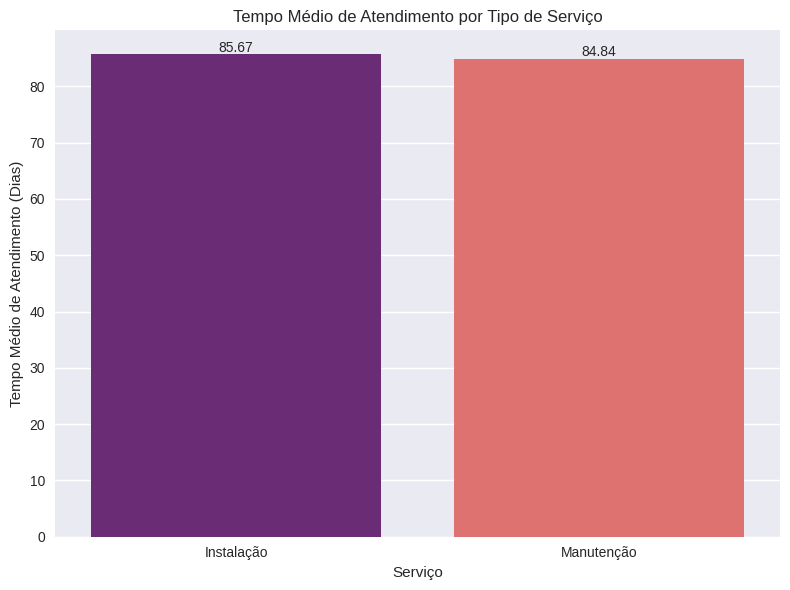

In [43]:
print(f"\n{'=' * 20} Tempo Médio de Atendimento por Serviço {'=' * 20}")
if not atendidos.empty and 'TEMPO_ATENDIMENTO_DIAS' in atendidos.columns:
    tempo_atendimento_por_servico = atendidos.groupby('SERVICO')['TEMPO_ATENDIMENTO_DIAS'].mean()
    tempo_atendimento_por_servico_ordenado = tempo_atendimento_por_servico.sort_values(ascending=False)

    print("Tempo Médio de Atendimento (Dias) por Serviço (Apenas Atendidos):")
    print(tempo_atendimento_por_servico_ordenado)

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=tempo_atendimento_por_servico_ordenado.index, y=tempo_atendimento_por_servico_ordenado.values,
                     palette='magma')
    plt.title('Tempo Médio de Atendimento por Tipo de Serviço')
    plt.xlabel('Serviço')
    plt.ylabel('Tempo Médio de Atendimento (Dias)')
    # Adiciona os valores nas barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.tight_layout()
    plt.show()
    plt.close()
else:
    print("Dados insuficientes para calcular o tempo médio de atendimento por serviço.")

### 7.4. Distribuição de Motivos de Cancelamento por Tipo de Serviço
Investiga a relação entre o tipo de serviço e os motivos de cancelamento associados.


==================== Distribuição de Motivos de Cancelamento por Serviço ====================


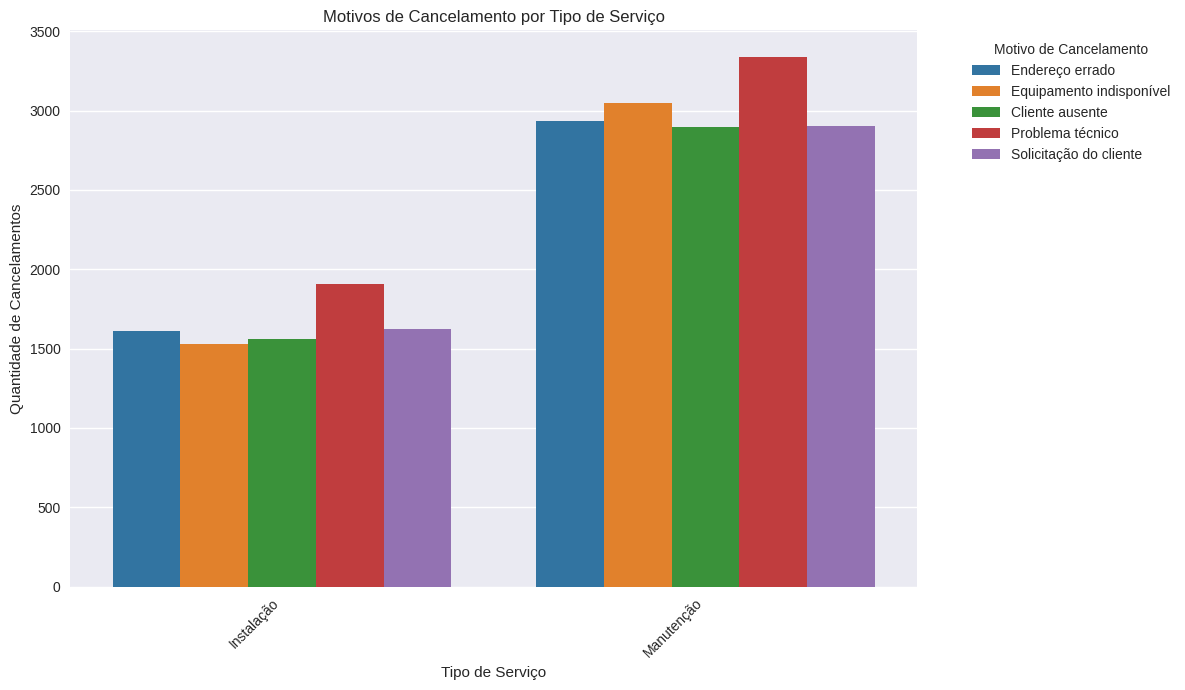

In [44]:
print(f"\n{'=' * 20} Distribuição de Motivos de Cancelamento por Serviço {'=' * 20}")
if not cancelados.empty and 'MOTIVO_CANCELAMENTO' in cancelados.columns:
    plt.figure(figsize=(12, 7))
    ax = sns.countplot(data=cancelados, x='SERVICO', hue='MOTIVO_CANCELAMENTO', palette='tab10')
    plt.title('Motivos de Cancelamento por Tipo de Serviço')
    plt.xlabel('Tipo de Serviço')
    plt.ylabel('Quantidade de Cancelamentos')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Motivo de Cancelamento', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    plt.close()
else:
    print("Não há chamados cancelados para analisar motivos por serviço.")

## 8. Análise Comparativa de Prazos

Compara o tempo médio de atendimento da Cielo com benchmarks de mercado (concorrência e expectativa do cliente) para avaliar competitividade.


##############################
# Análise Comparativa de Prazos
##############################

Tempo Médio de Atendimento da Cielo (Chamados Atendidos): 85.30 dias
Prazo Máximo da Concorrência (Outras Adquirentes): 2.00 dias
Expectativa do Cliente (Setor Logístico Geral): 1.00 dias


/tmp/ipykernel_23448/344924914.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Métrica', y='Dias', data=prazos_comp, palette='coolwarm')


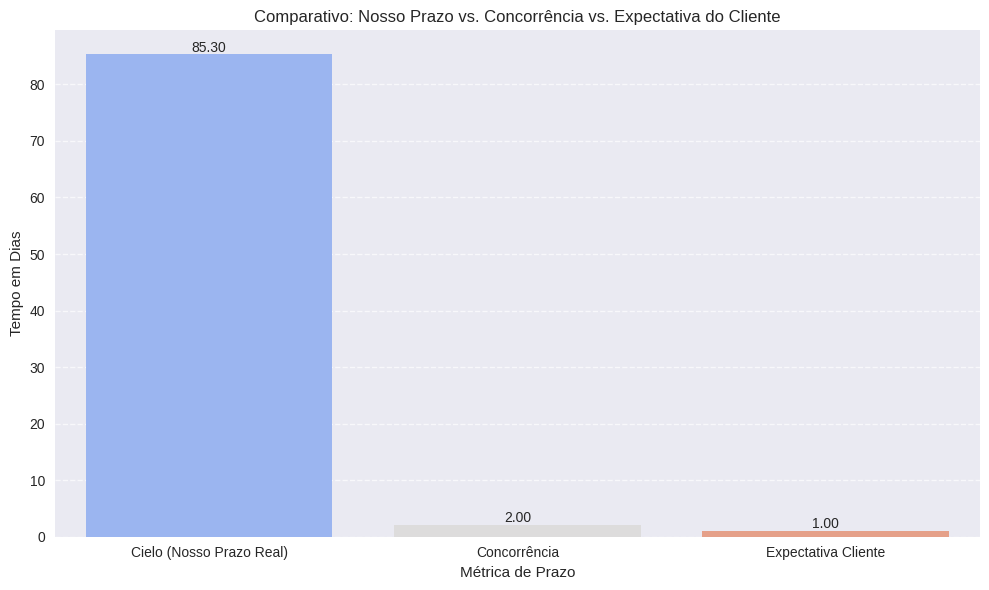

In [45]:
print(f"\n{'#' * 30}\n# Análise Comparativa de Prazos\n{'#' * 30}")

if 'PRAZO_MAXIMO_CONCORRENCIA_DIAS' in df.columns and 'EXPECTATIVA_CLIENTE_DIAS' in df.columns:
    df['PRAZO_HORAS_DIAS'] = df['PRAZO_HORAS'] / 24.0
    media_tempo_atendimento = atendidos['TEMPO_ATENDIMENTO_DIAS'].mean() if not atendidos.empty else 0

    # Pega o primeiro valor de prazos de concorrência/expectativa, assumindo que são constantes no dataset sintético
    prazo_concorrencia = df['PRAZO_MAXIMO_CONCORRENCIA_DIAS'].iloc[0] if not df.empty else None
    expectativa_cliente = df['EXPECTATIVA_CLIENTE_DIAS'].iloc[0] if not df.empty else None

    print(f"\nTempo Médio de Atendimento da Cielo (Chamados Atendidos): {media_tempo_atendimento:.2f} dias")
    if prazo_concorrencia is not None:
        print(f"Prazo Máximo da Concorrência (Outras Adquirentes): {prazo_concorrencia:.2f} dias")
    if expectativa_cliente is not None:
        print(f"Expectativa do Cliente (Setor Logístico Geral): {expectativa_cliente:.2f} dias")

    if media_tempo_atendimento is not None and prazo_concorrencia is not None and expectativa_cliente is not None:
        prazos_comp = pd.DataFrame({
            'Métrica': ['Cielo (Nosso Prazo Real)', 'Concorrência', 'Expectativa Cliente'],
            'Dias': [media_tempo_atendimento, prazo_concorrencia, expectativa_cliente]
        })

        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x='Métrica', y='Dias', data=prazos_comp, palette='coolwarm')
        plt.title('Comparativo: Nosso Prazo vs. Concorrência vs. Expectativa do Cliente')
        plt.xlabel('Métrica de Prazo')
        plt.ylabel('Tempo em Dias')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        # Adiciona os valores nas barras
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        plt.tight_layout()
        plt.show()
        plt.close()
    else:
        print("Dados insuficientes para análise comparativa de prazos.")
else:
    print("Colunas de comparação de prazos (PRAZO_MAXIMO_CONCORRENCIA_DIAS ou EXPECTATIVA_CLIENTE_DIAS) não encontradas.")

## 9. Conclusão

Esta análise exploratória forneceu uma visão detalhada do desempenho dos chamados logísticos da Cielo, identificando áreas de força e possíveis pontos de melhoria, especialmente em relação a locais e tipos de serviço. Os insights obtidos aqui são cruciais para futuras ações estratégicas.

In [46]:
print(f"\n{'#' * 30}\n# Fim da Análise Exploratória\n{'#' * 30}")
print("Revise os gráficos e as estatísticas para identificar padrões e possíveis problemas.")
print("As análises acima fornecem subsídios para responder às perguntas guias do desafio.")


##############################
# Fim da Análise Exploratória
##############################
Revise os gráficos e as estatísticas para identificar padrões e possíveis problemas.
As análises acima fornecem subsídios para responder às perguntas guias do desafio.
